# ML Practical 9 - XOR Gate Backpropogation

# Name: Shah Smit Kiran

# Roll No: 19BCE260

# Importing libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

#Defining Function for Initializing Parameters, Forward Propogation ,Backward Propogation and Updating Parameters

In [14]:
def initialize_parameters(in_featurs, total_middle_neurons, out_features):
    W1 = np.random.randn(total_middle_neurons, in_features)
    W2 = np.random.randn(out_features, total_middle_neurons)
    b1 = np.zeros((total_middle_neurons,1))
    b2 = np.zeros((out_features, 1))
    
    parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    return(parameters)

def forward_propagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    net1 = np.dot(W1, X) + b1
    A1 = 1/ (1 + np.exp(-net1))
    
    net2 = np.dot(W2, A1) + b2
    A2 = 1/ (1 + np.exp(-net2))
    
    cache = (net1, A1, W1, b1, net2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2),(1-Y))
    cost = -np.sum(logprobs)/m
    return(cost,cache,A2)

def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (net1, A1, W1, b1, net2, A2, W2, b2) = cache
    
    ddnet2 = A2 - Y
    dnet2 = np.multiply(ddnet2, A2 *(1-A2))
    dW2 = np.dot(dnet2, A1.T)/m
    db2 = np.sum(dnet2,axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dnet2)
    dnet1 = np.multiply(dA1, A1 * (1-A1))
    dW1 = np.dot(dnet1, X.T)/ m
    db1 = np.sum(dnet1, axis = 1, keepdims = True) / m
    
    gradients = {"dZ2":dnet2, "dW2": dW2, "db2":db2, "dZ1":dnet1, "dW1":dW1, "db1":db1}
    return(gradients)

def updating_parameters(parameters, gradients, learning_rate):
    parameters["W1"] = parameters["W1"] - learning_rate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learning_rate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learning_rate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learning_rate * gradients["db2"]
    return(parameters)

#Define Model Parameters

In [15]:
X = np.array([[0,0,1,1],[0,1,0,1]])
Y = np.array([[0,1,1,0]])

neurons_inmiddle_layers = 2
in_features = X.shape[0]
out_features = Y.shape[0]
parameters = initialize_parameters(in_features, neurons_inmiddle_layers, out_features)


In [16]:
epoch = 100000
learning_rate = 0.01
losses = np.zeros((epoch,1))

for i in range(epoch):
    losses[i,0], cache, A2 = forward_propagation(X,Y,parameters)
    gradients = backward_propagation(X,Y,cache)
    parameters = updating_parameters(parameters,gradients,learning_rate)

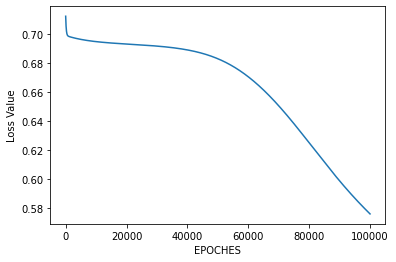

In [17]:
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHES")
plt.ylabel("Loss Value")
plt.show()

#Testing

In [18]:
X = np.array([[1,1,0,0],[0,1,0,1]])
cost, temp, A2 = forward_propagation(X,Y,parameters)
prediction = (A2>0.5)*1.0

print(prediction)

[[1. 1. 0. 1.]]
